In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
### Import packages
from skimage.io import imread
from glob import glob
import IPython.display
import PIL.Image

import math
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from skimage.io import imread
from skimage.measure import block_reduce
from sklearn.metrics import roc_auc_score

from tensorflow.python.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.python.keras.models import Sequential, model_from_json
from tensorflow.python.keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation, SeparableConv2D
from keras.layers import Conv2D, MaxPool2D
from keras.optimizers import RMSprop, Adam
from tensorflow.python.lib.io import file_io
import cv2

from sklearn import *

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
import numpy as np 
import keras
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau

from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


In [0]:
X_train = np.load('/content/drive/My Drive/Christina-Myrto/Big Data Content Analytics/Input/X_train_array.npy')
X_val = np.load('/content/drive/My Drive/Christina-Myrto/Big Data Content Analytics/Input/X_val_array.npy')
X_test = np.load('/content/drive/My Drive/Christina-Myrto/Big Data Content Analytics/Input/X_test_array.npy')

y_train = np.load('/content/drive/My Drive/Christina-Myrto/Big Data Content Analytics/Input/y_train_array.npy')
y_val = np.load('/content/drive/My Drive/Christina-Myrto/Big Data Content Analytics/Input/y_val_array.npy')
y_test = np.load('/content/drive/My Drive/Christina-Myrto/Big Data Content Analytics/Input/y_test_array.npy')

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
activation_10 (Activation)   (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 30, 30, 16)        2320      
_________________________________________________________________
activation_11 (Activation)   (None, 30, 30, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 30, 30, 32)        4640      
_________________________________________________________________
activation_12 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 28, 28, 32)       

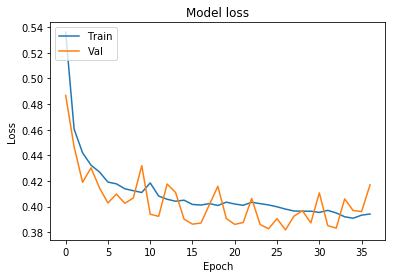

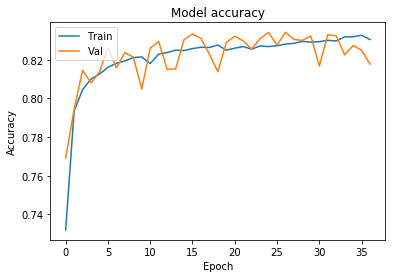

Loss = 0.414193
Accuracy: 0.820023
Precision: 0.843954
Recall: 0.682267
F1 score: 0.754546
Cohens kappa: 0.614970
ROC AUC: 0.888986
Confusion matrix:
[[11941  1124]
 [ 2831  6079]]


In [0]:
# Model 10a
model = Sequential()
model.add(Conv2D(16, (3, 3), padding='same', input_shape=(32,32,3)))
model.add(Activation('relu'))
model.add(Conv2D(16, (3, 3)))
model.add(Activation('relu'))

model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# adding last layers - flattening and Dence
model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

## Compile model
model.compile(loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

# print model layers' info
print(model.summary())

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
reduce_lr = ReduceLROnPlateau(monitor='val_acc', mode='max', factor=0.2, patience=5, verbose=1, min_lr=0.001)
mc = ModelCheckpoint('best_model10a.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

# Train the model
m = model.fit(
    X_train,            # features (as dense inputs)
    y_train,            # labels
    epochs=200,         # number of epochs
    batch_size=32,      # define batch size
    verbose=1,          # the most extended verbose
    validation_data=(       
        X_val,          # the validation split that we did before
        y_val
    ),
    callbacks=[es, mc, reduce_lr]
    )

################################################################################
## Plot Loss & Accuracy Curves
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

################################################################################
# Demonstration of calculating metrics for a neural network model using sklearn
# predict probabilities for test set
yhat_probs = model.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = model.predict_classes(X_test, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]

# evaluate model
Loss,_ = model.evaluate(X_test, y_test, verbose=0)
print('Loss = %.6f' % Loss)
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print('Confusion matrix:')
print(matrix)

In [0]:
# Model 10b (without dropout)
model = Sequential()
model.add(Conv2D(16, (3, 3), padding='same', input_shape=(32,32,3)))
model.add(Activation('relu'))
model.add(Conv2D(16, (3, 3)))
model.add(Activation('relu'))
#model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
#model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

# adding last layers - flattening and Dence
model.add(Flatten())
model.add(Dense(512))
#model.add(BatchNormalization())
model.add(Activation('relu'))
#model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

## Compile model
model.compile(loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

# print model layers' info
print(model.summary())

# Train the model
m = model.fit(
    X_train,            # features (as dense inputs)
    y_train,            # labels
    epochs=100,          # number of epochs
    batch_size=128,     # define batch size
    verbose=1,          # the most extended verbose
    validation_data=(       
        X_val,          # the validation split that we did before
        y_val
    )
    )

################################################################################
## Plot Loss & Accuracy Curves
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

################################################################################
# Demonstration of calculating metrics for a neural network model using sklearn
# predict probabilities for test set
yhat_probs = model.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = model.predict_classes(X_test, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]

# evaluate model
Loss,_ = model.evaluate(X_test, y_test, verbose=0)
print('Loss = %.6f' % Loss)
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print('Confusion matrix:')
print(matrix)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
activation_10 (Activation)   (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 30, 30, 16)        2320      
_________________________________________________________________
activation_11 (Activation)   (None, 30, 30, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 30, 30, 32)        4640      
_________________________________________________________________
activation_12 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 28, 28, 32)       

W0830 20:45:22.014738 139958831851392 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0830 20:45:22.101280 139958831851392 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0830 20:45:22.128896 139958831851392 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0830 20:45:22.212435 139958831851392 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4267: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0830 20:45:22.220312 139958831851392 deprecation_wrapp

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 16)        2320      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 30, 30, 32)        4640      
_________________________________________________________________
activation_3 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 32)       

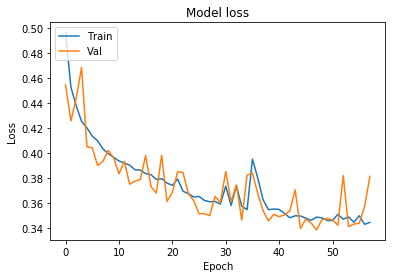

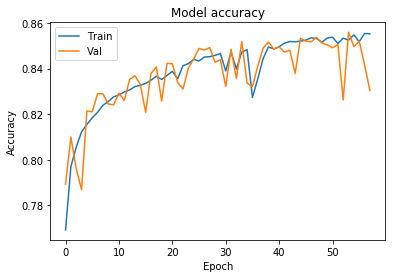

Loss = 0.379684
Accuracy: 0.834084
Precision: 0.775602
Recall: 0.831313
F1 score: 0.802492
Cohens kappa: 0.659752
ROC AUC: 0.910202
Confusion matrix:
[[10922  2143]
 [ 1503  7407]]


In [0]:
# Model 10d (without batch normalization and with greater batch size)
model = Sequential()
model.add(Conv2D(16, (3, 3), padding='same', input_shape=(32,32,3)))
model.add(Activation('relu'))
model.add(Conv2D(16, (3, 3)))
model.add(Activation('relu'))

model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# adding last layers - flattening and Dence
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

## Compile model
model.compile(loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

# print model layers' info
print(model.summary())

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
reduce_lr = ReduceLROnPlateau(monitor='val_acc', mode='max', factor=0.2, patience=5, verbose=1, min_lr=0.001)
mc = ModelCheckpoint('best_model10d.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

# Train the model
m = model.fit(
    X_train,            # features (as dense inputs)
    y_train,            # labels
    epochs=500,         # number of epochs
    batch_size=64,      # define batch size
    verbose=1,          # the most extended verbose
    validation_data=(       
        X_val,          # the validation split that we did before
        y_val
    ),
    callbacks=[es, mc, reduce_lr]
    )

################################################################################
## Plot Loss & Accuracy Curves
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

################################################################################
# Demonstration of calculating metrics for a neural network model using sklearn
# predict probabilities for test set
yhat_probs = model.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = model.predict_classes(X_test, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]

# evaluate model
Loss,_ = model.evaluate(X_test, y_test, verbose=0)
print('Loss = %.6f' % Loss)
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print('Confusion matrix:')
print(matrix)


W0830 21:57:58.045904 139958831851392 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:2041: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
activation_10 (Activation)   (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 30, 30, 16)        2320      
_________________________________________________________________
activation_11 (Activation)   (None, 30, 30, 16)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 16)        64        
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 30, 30, 32)        4640      
_________________________________________________________________
activation_12 (Activation)   (None, 30, 30, 32)       

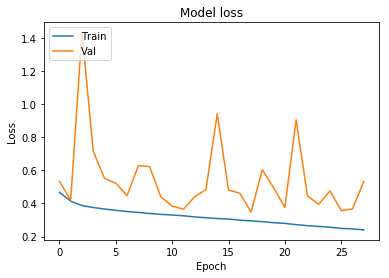

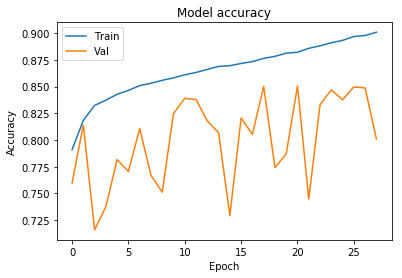

Loss = 0.523001
Accuracy: 0.802139
Precision: 0.713178
Recall: 0.856453
F1 score: 0.778276
Cohens kappa: 0.602310
ROC AUC: 0.895502
Confusion matrix:
[[9996 3069]
 [1279 7631]]


In [0]:
# Model 10e (with batch normalization and greater batch size)
model = Sequential()
model.add(Conv2D(16, (3, 3), padding='same', input_shape=(32,32,3)))
model.add(Activation('relu'))
model.add(Conv2D(16, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# adding last layers - flattening and Dence
model.add(Flatten())
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

## Compile model
model.compile(loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

# print model layers' info
print(model.summary())

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
reduce_lr = ReduceLROnPlateau(monitor='val_acc', mode='max', factor=0.2, patience=5, verbose=1, min_lr=0.001)
mc = ModelCheckpoint('best_model10c.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

# Train the model
m = model.fit(
    X_train,            # features (as dense inputs)
    y_train,            # labels
    epochs=500,         # number of epochs
    batch_size=64,      # define batch size
    verbose=1,          # the most extended verbose
    validation_data=(       
        X_val,          # the validation split that we did before
        y_val
    ),
    callbacks=[es, mc, reduce_lr]
    )

################################################################################
## Plot Loss & Accuracy Curves
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

################################################################################
# Demonstration of calculating metrics for a neural network model using sklearn
# predict probabilities for test set
yhat_probs = model.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = model.predict_classes(X_test, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]

# evaluate model
Loss,_ = model.evaluate(X_test, y_test, verbose=0)
print('Loss = %.6f' % Loss)
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print('Confusion matrix:')
print(matrix)